# Stock programming 

# Ch.1 股價繪圖：使用 matplotlib套件

製作者：賴志宏 建立日期：2020.07.18 最後修改日期：2020.11.19

## 資料前處理

### 1. TEJ的檔案匯出

* 左邊功能表 TEJ股價資料庫 / 未調整股價（日）按兩下/ 選擇股票和查詢日期
    * 輸入股票名稱或代號
        * 若無法選擇股票，則需更改功能表的「ID組別/ All ID Group」
    * 日期範圍：輸入起迄時間，
        * 20190101-201931:為2019整年度
        * 20180101-   :為2018年1月1日至今
* 日期排序：按照時間先後次序排列，最早的時間在上面
* 上面功能表的「匯出」 => 自動開啟EXCEL，並將檔案打開

### 2. CSV檔案處理
* 在Excel軟體中：刪除前面幾列的資料，只保留完整的股價欄位
    * 注意：要刪除欄位，不是清空欄位內容
* 保留前六個欄位，其餘刪除
    * 年月日,開盤價(元),最高價(元),最低價(元),收盤價(元),成交量(千股)
    * 將前面欄位名稱改為：Date, Open, High, Low,	Close,	Volume  （也可以不改）
* 數字的部分要先拿掉每三位一撇的逗號（設定儲存格格式/取消「使用千分位符號」）
    * 或直接選用「通用格式」
* 另存新檔，副檔名要選擇「CSV)」，即用,隔開欄位


### CSV檔案內容

* 可用「記事本」軟體打開上述的CSV檔案，其內容如下：
* 每一筆資料都是EXCEL中一列的資料，每個欄位用逗號隔開

In [ ]:
Date,Open,High,Low,Close,Volume
2019/01/02,226.5,226.5,219,219.5,32900
2019/01/03,214,218,214,215.5,34615
2019/01/04,211.5,211.5,206.5,208,67043
2019/01/07,212,214,211,213,35695
2019/01/08,212,212.5,210,211,23794
2019/01/09,212,216.5,211,215.5,51255
2019/01/10,216,216.5,214.5,216,20832
2019/01/11,219,220.5,218,220.5,28658
2019/01/14,218.5,220,217,218.5,17612
2019/01/15,216.5,221,215.5,221,42990
2019/01/16,218.5,220,217.5,217.5,30038
2019/01/17,218,221,218,220.5,21163
2019/01/18,219,220,217.5,218.5,52677
2019/01/21,220,223,220,221,32515
2019/01/22,220,223,219,223,30958
2019/01/23,221.5,222,220,220.5,18671
2019/01/24,222.5,222.5,220.5,222.5,31348

## 使用 python 處理 CSV 檔案

In [1]:
# 讀檔案
SData = open('data/TEJ_2330_2019TO2020.csv').readlines()  # 將檔案內容存到串列中，每一列的資料為串列的一個元素
print(SData) 

# 每行為串列的一個元素，欄位之間為逗號，每行最後面有換行符號 \n

['Date,Open,High,Low,Close,Volume\n', '2019/01/02,226.5,226.5,219,219.5,32900\n', '2019/01/03,214,218,214,215.5,34615\n', '2019/01/04,211.5,211.5,206.5,208,67043\n', '2019/01/07,212,214,211,213,35695\n', '2019/01/08,212,212.5,210,211,23794\n', '2019/01/09,212,216.5,211,215.5,51255\n', '2019/01/10,216,216.5,214.5,216,20832\n', '2019/01/11,219,220.5,218,220.5,28658\n', '2019/01/14,218.5,220,217,218.5,17612\n', '2019/01/15,216.5,221,215.5,221,42990\n', '2019/01/16,218.5,220,217.5,217.5,30038\n', '2019/01/17,218,221,218,220.5,21163\n', '2019/01/18,219,220,217.5,218.5,52677\n', '2019/01/21,220,223,220,221,32515\n', '2019/01/22,220,223,219,223,30958\n', '2019/01/23,221.5,222,220,220.5,18671\n', '2019/01/24,222.5,222.5,220.5,222.5,31348\n', '2019/01/25,226.5,227,225,226,48039\n', '2019/01/28,229.5,229.5,228,229,29134\n', '2019/01/29,222.5,225,222,222.5,42566\n', '2019/01/30,220.5,221.5,220,221,51889\n', '2019/02/11,228,229,226.5,228,81360\n', '2019/02/12,230,230,229,230,30125\n', '2019/02/13,

In [20]:
# 印出串列的部分內容

print(SData[3])
print()
print(SData[1:5])
print()
print(SData[:5])   # 列出前五筆（串列的前五個元素）的資料

2019/01/04,211.5,211.5,206.5,208,67043


['2019/01/02,226.5,226.5,219,219.5,32900\n', '2019/01/03,214,218,214,215.5,34615\n', '2019/01/04,211.5,211.5,206.5,208,67043\n', '2019/01/07,212,214,211,213,35695\n']

['Date,Open,High,Low,Close,Volume\n', '2019/01/02,226.5,226.5,219,219.5,32900\n', '2019/01/03,214,218,214,215.5,34615\n', '2019/01/04,211.5,211.5,206.5,208,67043\n', '2019/01/07,212,214,211,213,35695\n']


In [11]:
# 整理資料到 2維串列，寫法一：
# 以下欄位有分解說明

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = []
for line in SData[1:]:
    line = line.strip('\n').split(',')
    SData2.append(line)
print(SData1[:5])

[['2019/01/02', '226.5', '226.5', '219', '219.5', '32900'], ['2019/01/03', '214', '218', '214', '215.5', '34615'], ['2019/01/04', '211.5', '211.5', '206.5', '208', '67043'], ['2019/01/07', '212', '214', '211', '213', '35695'], ['2019/01/08', '212', '212.5', '210', '211', '23794']]


In [35]:
print(SData[1])

['2019/01/02', '226.5', '226.5', '219', '219.5', '32900']


In [23]:
# 分解說明 1
# 字串轉為串列的方式：字串.split(',') 

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
print('字串轉換前：', SData[1])  # 有換行符號，但未顯示出來
# SData 為第 0欄資料為 欄位名稱，如Date, Open等，所以從第 1欄位開始
s = SData[1].split(',')
print('字串轉換後，成為串列：', s)

字串轉換前： 2019/01/02,226.5,226.5,219,219.5,32900

字串轉換後，成為串列： ['2019/01/02', '226.5', '226.5', '219', '219.5', '32900\n']


In [26]:
# 分解說明 2
# 字串轉為串列的方式：字串.split(',') 

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
print('字串轉換前：', SData[1])
s = SData[1].strip('\n')  # 刪除換行符號
s = s.split(',')
print('字串轉換後，成為串列：', s)

#　將上述敘述寫在一起
print()
s2 = SData[2].strip('\n').split(',')
print(s2)

# 回到 「整理資料到2維串列，寫法一」 的介紹 cell

字串轉換前： 2019/01/02,226.5,226.5,219,219.5,32900

字串轉換後，成為串列： ['2019/01/02', '226.5', '226.5', '219', '219.5', '32900']

['2019/01/03', '214', '218', '214', '215.5', '34615']


In [36]:
# 整理資料到2維串列，寫法二：

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()

SData1 = [line.strip('\n') for line in SData[1:]]  # 步驟 1：拿掉換行符號
print(SData1[:5])


print(); print()

SData1 = [line.split(',') for line in SData[1:]] # 步驟 2：將每一個用逗號分隔的內容，即一個欄位轉換為一個串列的元素
print(SData1[:5])

['2019/01/02,226.5,226.5,219,219.5,32900', '2019/01/03,214,218,214,215.5,34615', '2019/01/04,211.5,211.5,206.5,208,67043', '2019/01/07,212,214,211,213,35695', '2019/01/08,212,212.5,210,211,23794']


[['2019/01/02', '226.5', '226.5', '219', '219.5', '32900\n'], ['2019/01/03', '214', '218', '214', '215.5', '34615\n'], ['2019/01/04', '211.5', '211.5', '206.5', '208', '67043\n'], ['2019/01/07', '212', '214', '211', '213', '35695\n'], ['2019/01/08', '212', '212.5', '210', '211', '23794\n']]


In [31]:
# 整理資料到 2維串列 ，將上面寫法二兩行寫在一起
# 精簡版

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] # 將每一個用逗號分隔的內容，即一個欄位轉換為一個串列的元素
print(SData1[:5])



[['2019/01/02', '226.5', '226.5', '219', '219.5', '32900'], ['2019/01/03', '214', '218', '214', '215.5', '34615'], ['2019/01/04', '211.5', '211.5', '206.5', '208', '67043'], ['2019/01/07', '212', '214', '211', '213', '35695'], ['2019/01/08', '212', '212.5', '210', '211', '23794']]


In [37]:
# 欄位名稱

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData ] 
print(SData1[0])

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [108]:
# 抓取各欄位資料的方式：例如日期、收盤價等
# 但是抓取的格式為字串，需要再更改格式，如下一個 cell

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [line[0] for line in SData1]
s_open = [line[1] for line in SData1]
s_close = [line[4] for line in SData1]

print(s_date[:5])
print()
print(s_close[:5])

['2019/01/02', '2019/01/03', '2019/01/04', '2019/01/07', '2019/01/08']

['219.5', '215.5', '208', '213', '211']


In [109]:
# 抓取各欄位資料的方式，並更改格式


from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]

print(s_date[:5])
print()
print(s_close[:5])

[datetime.datetime(2019, 1, 2, 0, 0), datetime.datetime(2019, 1, 3, 0, 0), datetime.datetime(2019, 1, 4, 0, 0), datetime.datetime(2019, 1, 7, 0, 0), datetime.datetime(2019, 1, 8, 0, 0)]

[219.5, 215.5, 208.0, 213.0, 211.0]


In [ ]:
# 取部分資料

SData2 = [line for line in SData1 if line[0].year == 2020]  # 只取2020年的資料
# SData2 = [line for line in SData1 if line[0].year >= 2015]  # 取2015年之後的資料

## matplotlib 繪圖

### 繪製價格折線圖

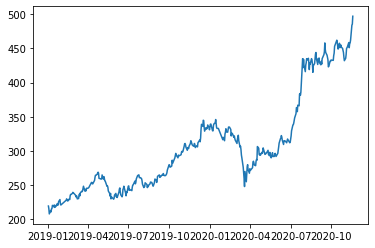

In [47]:
# 繪製股價收盤折線圖

import matplotlib.pyplot as plt
from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]
plt.plot(s_date, s_close)
plt.show()

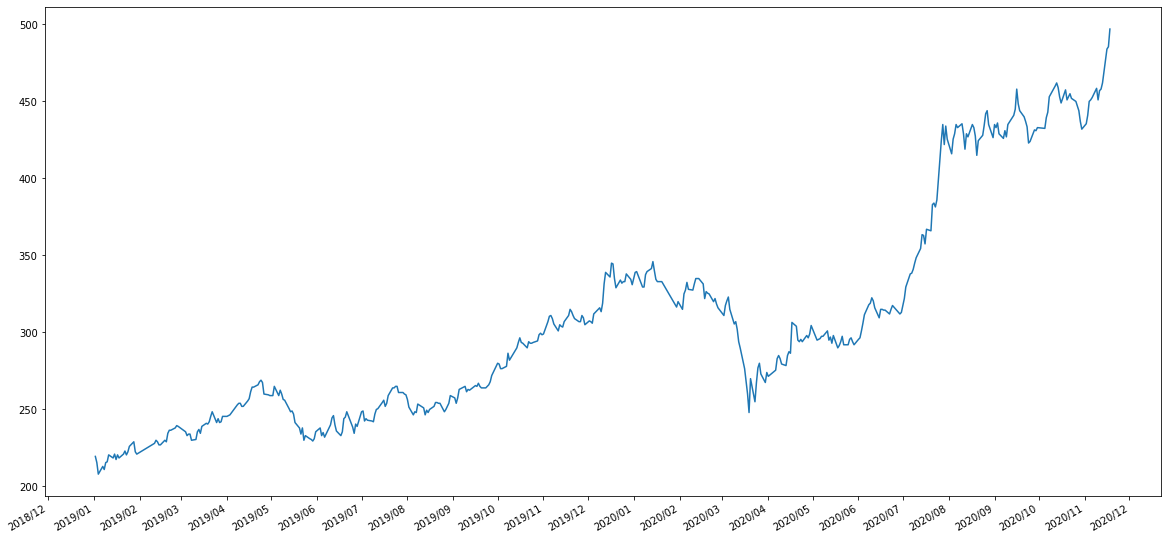

In [110]:
# 繪製股價收盤折線圖，增加繪圖屬性

import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]

plt.figure(figsize = (20,10)) # 設定圖形大小

# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次

# Plot
plt.plot(s_date, s_close)
plt.gcf().autofmt_xdate()  # 自動旋轉日期標記
plt.show()

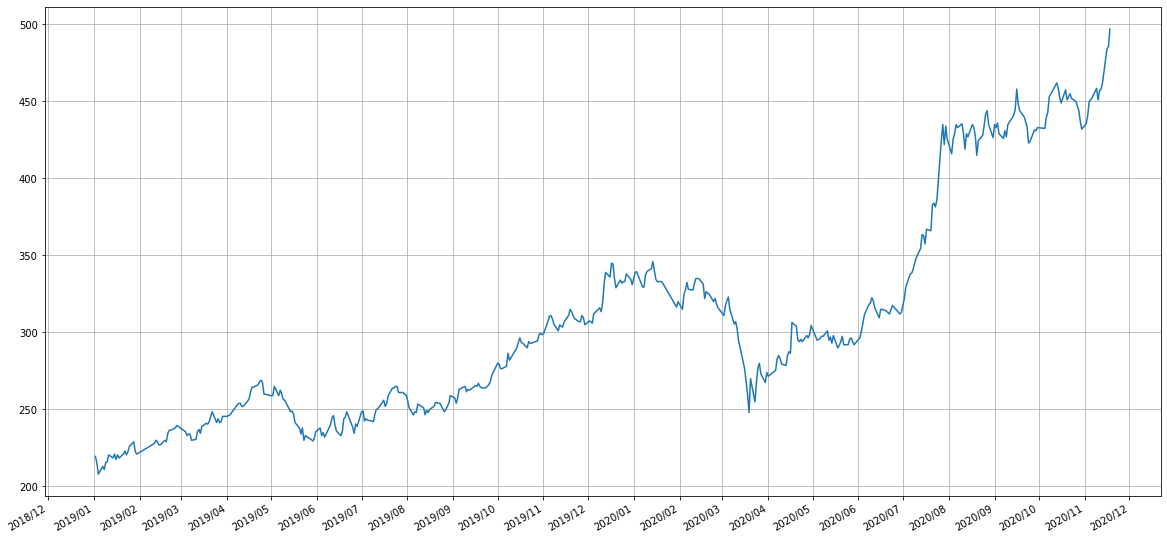

In [111]:
# 繪製股價收盤折線圖，加上格線

import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]

plt.figure(figsize = (20,10)) # 設定圖形大小

# 配置横坐标
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # x座標每月顯示一次
plt.grid()   # x 和 y 軸都有格線
# plt.grid(axis = 'y')

# Plot
plt.plot(s_date, s_close)
plt.gcf().autofmt_xdate()  # 自動旋轉日期標記
plt.show()

### 繪製價量關係圖

NameError: name 's_date' is not defined

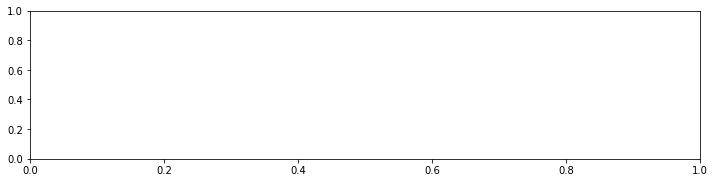

In [1]:
# 繪製價格折線圖與成交量
# 使用 subplot()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_dates = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]
s_volume = [float(line[5]) for line in SData1]

plt.figure(figsize = (12, 6)) # 設定圖形大小

# Plot
plt.subplot(211)
# subplot(2, 3, 1) # 共有2列的子圖表，共有3行,要在第 1張圖繪圖 (總共會有2*3=6張圖，由左到右，上到下排列，也就是先水平再垂直）
plt.plot(s_date, s_close)

plt.subplot(212)
plt.bar(s_date, s_volume, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()

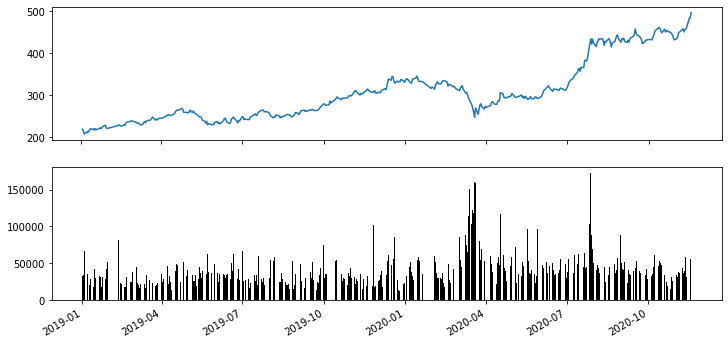

In [98]:
# 繪製價格折線圖與成交量
# 使用 .add_subplot()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_dates = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]
s_volume = [float(line[5]) for line in SData1]

plt.figure(figsize = (12, 6)) # 設定圖形大小

fig = plt.figure(1)   #第一張圖片              
ax1 = fig.add_subplot(211)

# subplot(2, 3, 1) # 共有2列的子圖表，共有3行,要在第 1張圖繪圖 (總共會有2*3=6張圖，由左到右，上到下排列，也就是先水平再垂直）

# # 配置横座標
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # x座標每年顯示一次
# Plot
ax1.plot(s_date, s_close)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

ax2 = fig.add_subplot(212)
ax2.bar(s_date, s_volume, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()

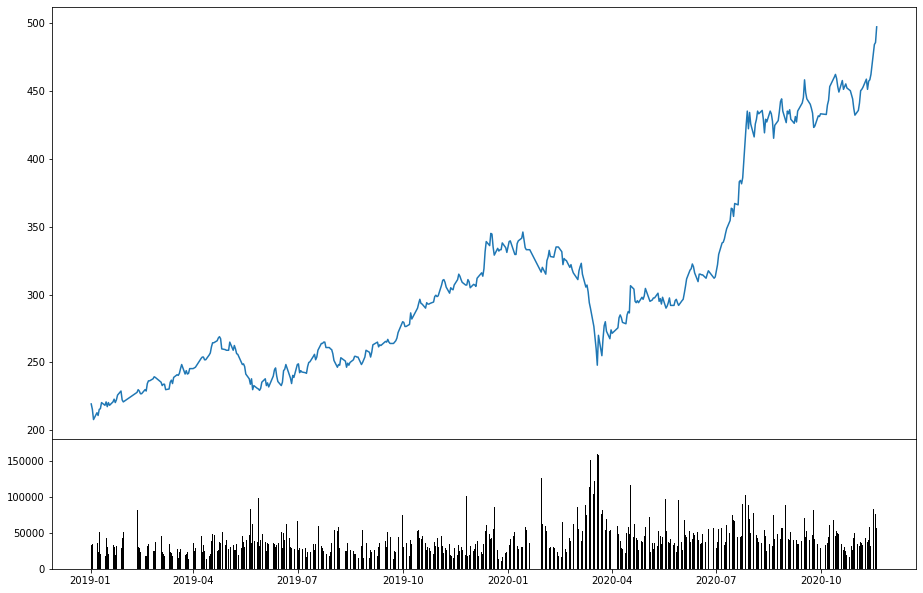

In [1]:
# 繪製價格折線圖與成交量
# 使用 .add_axes()
# add_axes( x初始座標, y初始座標, 寬, 高 )
# 原始座標為左下角，寬與高的值為 0 至 1 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]
s_volume = [float(line[5]) for line in SData1]

fig = plt.figure(figsize = (12, 6)) # 設定圖形大小

ax1 = fig.add_axes([0,0.3,1,1])    #  上方的圖，供繪製股價
ax2 = fig.add_axes([0,0,1,0.3])    #  下方的圖，供繪製量能

# Plot
ax1.plot(s_date, s_close)
# plt.gcf().autofmt_xdate()  # 自动旋转日期标记

# ax2 = fig.add_subplot(212)
# ax2.bar(xs, QValue,width=0.5)
ax2.bar(s_date, s_volume, color ='black')
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()

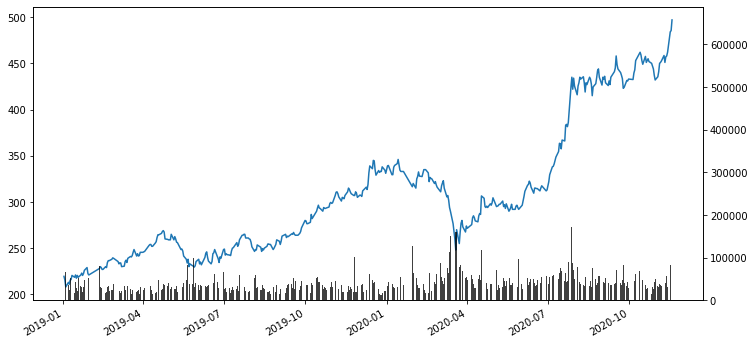

In [116]:
# 用一張圖繪製價格折線圖與成交量

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

SData = open('data/TEJ_2330_2019TO2020.csv').readlines()
SData1 = [line.strip('\n').split(',') for line in SData[1:] ] 

s_date = [datetime.strptime(line[0], '%Y/%m/%d') for line in SData1]
s_close = [float(line[4]) for line in SData1]
s_volume = [float(line[5]) for line in SData1]

fig = plt.figure(figsize = (12, 6)) # 設定圖形大小
       
ax1 = fig.add_subplot(111)
ax1.plot(s_date, s_close)

ax2 = ax1.twinx()     # 設定讓價與量的兩張圖重疊放在一張圖中
ax2.set_ylim([0, max(s_volume)*4])  #設定y座標，使量的圖顯示在下方：即量的最大數值的4倍會到 y軸的最高點，也就是設定量只畫到 1/4y
ax2.bar(s_date, s_volume, color ='black', alpha = 0.75) #alpha為顏色的透明度
plt.gcf().autofmt_xdate()  # 自动旋转日期标记
#顯示繪製圖表
plt.show()


## 自訂函式

In [ ]:
# 定義函式

def GetStock(file_name):
    from datetime import datetime

    SData = open(file_name).readlines()
    SData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

    SData2 = [[datetime.strptime(line[0], '%Y/%m/%d').date(), float(line[1]), float(line[2]), \
           float(line[3]), float(line[4]), float(line[5])] for line in SData[1: ] ]
    return SData2

'''
    [0]: 'date'
    [1]: 'open'
    [2]: 'high'
    [3]: 'low'
    [4]: 'close'
    [5]: 'volume'
    
'''

In [84]:
#  呼叫函式

stock = GetStock('data/TEJ_2330_2019TO2020.csv')

s_date = [line[0] for line in stock]
s_open = [line[1] for line in stock]
s_high = [line[2] for line in stock]
s_low = [line[3] for line in stock]
s_close = [line[4] for line in stock]
s_volume =[line[5] for line in stock]

print(S_date[:5])
print()
print(s_close[:5])


[datetime.date(2019, 1, 2), datetime.date(2019, 1, 3), datetime.date(2019, 1, 4), datetime.date(2019, 1, 7), datetime.date(2019, 1, 8)]

[219.5, 215.5, 208.0, 213.0, 211.0]
